# Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Data reading

In [2]:
df = pd.read_csv('../input/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


# Data Processing

In [5]:
df = df.astype(float)

In [6]:
X = df.drop('label',axis=1)
y = df['label']

In [7]:
X /= 255

In [8]:
y = y.astype('int8')

In [9]:
df.isnull().sum().sum()

0

## Test Split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, shuffle=True)

# Models

## Model 1 - Default Random Forest

In [11]:
m1 = RandomForestClassifier(n_jobs=-1)
%time m1.fit(X_train, y_train)
[m1.score(X_train, y_train), m1.score(X_val, y_val)]

Wall time: 988 ms


[0.9990476190476191, 0.9389285714285714]

## Model 2 - Random Forest with min_samples_leaf

Min samples leaf: 1
Min samples leaf: 2
Min samples leaf: 3
Min samples leaf: 4
Min samples leaf: 5
Min samples leaf: 6
Min samples leaf: 7
Min samples leaf: 8
Min samples leaf: 9


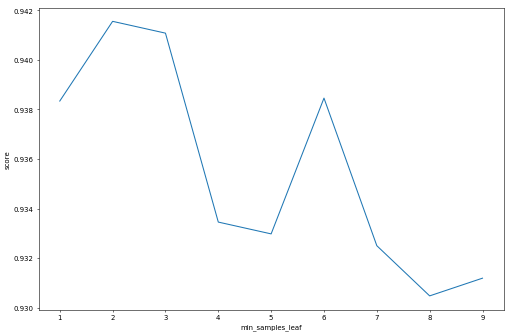

Wall time: 9.37 s


In [12]:
%%time
leaf_scores = list()
leaf_num_list = range(1,10)

for leaf_num in leaf_num_list :
    print(f'Min samples leaf: {leaf_num}')
    m = RandomForestClassifier(min_samples_leaf=leaf_num, n_jobs=-1)
    m.fit(X_train, y_train)
    leaf_scores.append(m.score(X_val ,y_val))
    
fig = plt.figure(figsize=(12, 8), dpi=50)
plt.plot(leaf_num_list, leaf_scores)
plt.ylabel('score')
plt.xlabel('min_samples_leaf')
plt.show()

In [13]:
best_leaf_score = max(leaf_scores)
best_leaf_num = leaf_num_list[leaf_scores.index(best_leaf_score)]
print(f"Best leaf score: {best_leaf_score} with {best_leaf_num} leaf(s)")

Best leaf score: 0.9415476190476191 with 2 leaf(s)


In [14]:
m2 = RandomForestClassifier(min_samples_leaf=best_leaf_num, n_jobs=-1)
%time m2.fit(X_train, y_train)
[m2.score(X_train, y_train), m2.score(X_val ,y_val)]

Wall time: 880 ms


[0.9956845238095238, 0.9378571428571428]

## Model 3 - Random Forest with n_estimators (num of trees)

Tree numbers: 10
Tree numbers: 25
Tree numbers: 50
Tree numbers: 100
Tree numbers: 250
Tree numbers: 500


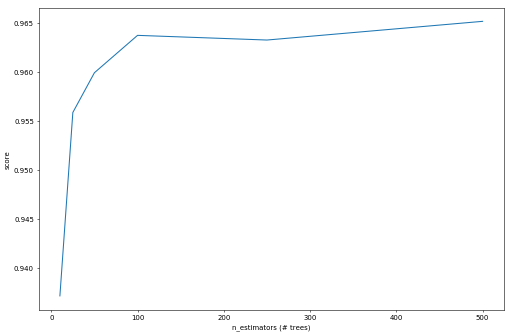

Wall time: 49.8 s


In [15]:
%%time
tree_scores = list()
tree_num_list = [10, 25, 50, 100, 250, 500]

for tree_num in tree_num_list :
    print(f'Tree numbers: {tree_num}')
    m = RandomForestClassifier(n_estimators=tree_num, n_jobs=-1)
    m.fit(X_train, y_train)
    tree_scores.append(m.score(X_val, y_val))

fig = plt.figure(figsize=(12, 8), dpi=50)
plt.plot(tree_num_list, tree_scores)
plt.ylabel('score')
plt.xlabel('n_estimators (# trees)')
plt.show()

In [16]:
best_tree_score = max(tree_scores)
best_tree_num = tree_num_list[tree_scores.index(best_tree_score)]
print(f"Best tree score: {best_tree_score} with {best_tree_num} leaf(s)")

Best tree score: 0.9651190476190477 with 500 leaf(s)


In [17]:
m3 = RandomForestClassifier(n_estimators=best_tree_num, n_jobs=-1)
%time m3.fit(X_train, y_train)
[m3.score(X_train, y_train), m.score(X_val, y_val)]

Wall time: 25.8 s


[1.0, 0.9651190476190477]

## Model 4 - Random Forest with max_features

In [18]:
%%time
max_features_scores = list()
max_features_list = ['auto','sqrt', 'log2', 0.5]

for max_feature in max_features_list : 
    m = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
    m.fit(X_train, y_train)
    score = m.score(X_val, y_val)
    print(f'Max_feature: {max_feature}, score = {score}')

Max_feature: auto, score = 0.9345238095238095
Max_feature: sqrt, score = 0.9392857142857143
Max_feature: log2, score = 0.9221428571428572
Max_feature: 0.5, score = 0.939047619047619
Wall time: 10.8 s


In [19]:
m4 = RandomForestClassifier(max_features=0.5, n_jobs=-1)
%time m4.fit(X_train, y_train)
[m4.score(X_train, y_train), m4.score(X_val, y_val)]

Wall time: 8.39 s


[0.99875, 0.9396428571428571]

## Model 5 - Random Forest - combining Model 2, 3 and 4

In [20]:
m5a = RandomForestClassifier(n_estimators=250, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
%time m5a.fit(X_train, y_train)
[m5a.score(X_train, y_train), m5a.score(X_val, y_val)]

Wall time: 2min 41s


[0.9969345238095239, 0.9575]

In [21]:
m5b = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, max_features=0.5, n_jobs=-1)
%time m5b.fit(X_train, y_train)
[m5b.score(X_train, y_train), m5b.score(X_val, y_val)]

Wall time: 7min


[0.9987202380952381, 0.9605952380952381]

In [ ]:
m5c = RandomForestClassifier(n_estimators=500, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
%time m5c.fit(X_train, y_train)
[m5c.score(X_train, y_train), m5c.score(X_val, y_val)]